In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Let's set a style sheet that we'll use for our plots
plt.style.use('ggplot')

import nltk

In [38]:
# Read in Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/NLP_Project_Topical_Chatbot/Datasets/topical_chat.csv')
df

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper
...,...,...,...
188373,8628,"Wow, it does not seem like that long. Since I...",Surprised
188374,8628,"I havent seen that episode, I might google it...",Curious to dive deeper
188375,8628,I don't think I have either. That's an insane...,Curious to dive deeper
188376,8628,"I did, my little brother used to love Thomas ...",Happy


**Sentiment Analysis:**

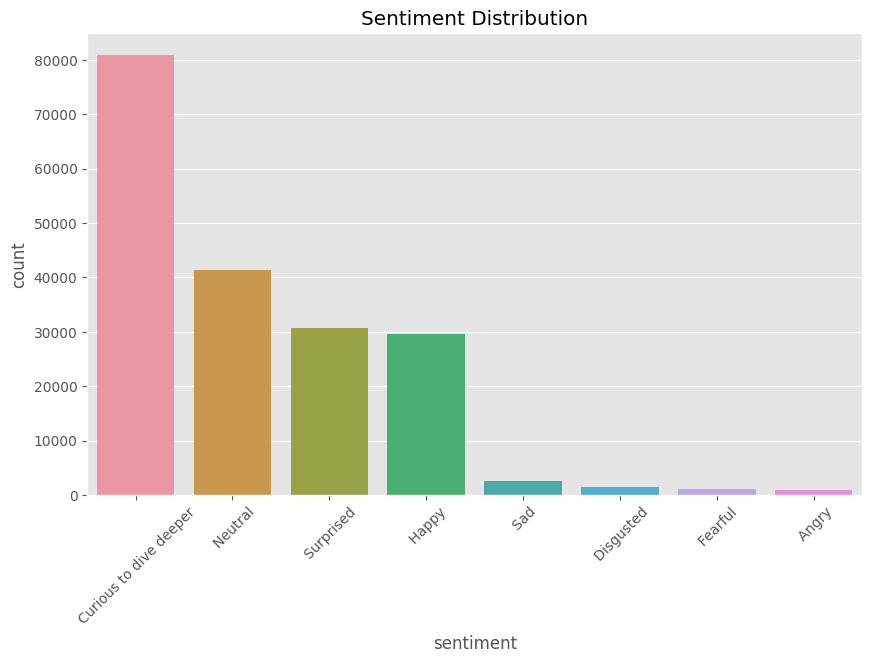

In [39]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()

**Preprocessing the Data**

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenization (split text into words)
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

# Apply text preprocessing to the 'message' column
df['message'] = df['message'].apply(preprocess_text)
df

,conversation_id,message,sentiment
0,1,fan google microsoft,Curious to dive deeper
1,1,excellent technology helpful many ways securit...,Curious to dive deeper
2,1,im huge fan google use lot think monopoly sense,Curious to dive deeper
3,1,google provides online related services produc...,Curious to dive deeper
4,1,yeah services good im fan intrusive personal l...,Curious to dive deeper
...,...,...,...
188373,8628,wow seem like long since mentioned simpsons ea...,Surprised
188374,8628,havent seen episode might google later yeah si...,Curious to dive deeper
188375,8628,dont think either thats insane amount episodes...,Curious to dive deeper
188376,8628,little brother used love thomas tank engine re...,Happy


In [42]:
# Encode sentiment labels into numerical values
from sklearn.preprocessing import LabelEncoder

# Sample data with the sentiment labels
sentiments = [
    'Curious to Dive Deeper',
    'Neutral',
    'Surprised',
    'Happy',
    'Sad',
    'Disgusted',
    'Fearful',
    'Angry'
]


# Remove leading and trailing spaces from the 'sentiment' column
df['sentiment'] = df['sentiment'].str.strip()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
df['encoded_sentiments'] = label_encoder.fit_transform(df['sentiment'])


# Display the mapping between original labels and encoded values
for sentiment, encoded_value in zip(sentiments, df['encoded_sentiments'].unique()):
    print(f"{sentiment}: {encoded_value}")


Curious to Dive Deeper: 1
Neutral: 4
Surprised: 5
Happy: 7
Sad: 2
Disgusted: 6
Fearful: 3
Angry: 0


In [43]:
# Display the first few rows of the DataFrame after preprocessing
df

,conversation_id,message,sentiment,encoded_sentiments
0,1,fan google microsoft,Curious to dive deeper,1
1,1,excellent technology helpful many ways securit...,Curious to dive deeper,1
2,1,im huge fan google use lot think monopoly sense,Curious to dive deeper,1
3,1,google provides online related services produc...,Curious to dive deeper,1
4,1,yeah services good im fan intrusive personal l...,Curious to dive deeper,1
...,...,...,...,...
188373,8628,wow seem like long since mentioned simpsons ea...,Surprised,7
188374,8628,havent seen episode might google later yeah si...,Curious to dive deeper,1
188375,8628,dont think either thats insane amount episodes...,Curious to dive deeper,1
188376,8628,little brother used love thomas tank engine re...,Happy,4


**Custom Word2Vec Model:**

In [44]:
!pip install gensim

In [45]:
from gensim.models import Word2Vec

# Tokenize the preprocessed text into a list of words for each sentence
tokenized_text = [sentence.split() for sentence in df['message']]

# Train Word2Vec model
w2v_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, sg=0)

# Save the model for future use
w2v_model.save("word2vec.model")

In [46]:
w2v_model.wv['insane']

array([ 0.25322318,  0.2199813 , -0.6000081 , -0.26241362,  0.25612235,
       -0.4046919 ,  0.3419124 ,  0.39422733, -1.4515183 ,  1.9684362 ,
       -0.5509613 ,  0.04864876, -0.64063054, -0.29535332, -0.35421076,
       -0.1165085 , -0.73765   , -0.02636655, -0.21209379,  0.80192417,
       -1.1710047 , -0.48825985,  0.37495485, -1.0628875 , -0.44376788,
       -0.41101837, -0.6004139 , -0.93642205,  1.0114762 , -1.0348047 ,
        0.15085754,  0.37510428,  0.43037674,  0.15727422,  0.53777725,
       -0.11659258, -0.51757216, -0.75862664, -0.631693  , -1.0360153 ,
       -0.9822787 , -0.74911237, -0.44036618, -0.16217412, -0.12286808,
        0.7263937 , -0.60947645, -0.40255716, -0.43410426, -0.13453212,
        0.4881243 , -1.2725977 , -0.07527951,  0.5509852 , -1.2727624 ,
        0.36655173, -0.66902167,  0.37705174, -0.02988955,  0.15961483,
       -0.25693685,  0.52497965, -0.20799714,  0.28362885,  0.6420128 ,
        1.284187  , -0.1571539 ,  0.8390216 , -0.74097973,  0.75

**Data Splitting:**

In [47]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and target labels (y)
X = df['message']  # Features
y = df['sentiment']  # Target labels

# Split the data into training, validation, and test sets
# Here, we'll use an 80-10-10 split, but you can adjust the ratios as needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the resulting sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 150702
Validation set size: 18838
Test set size: 18838


**Implementing BERT for Sentiment Analysis**

**Load the pre-trained BERT model:**

In [48]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the number of classes (sentiments) you have
num_classes = len(sentiments)

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Prepare your data for BERT:**

In [49]:
!pip install transformers torch

import torch


# Tokenize and format the data for training, validation, and test sets
max_length = 128  # Define the maximum sequence length

train_inputs = tokenizer(list(X_train), padding=True, truncation=True, max_length=max_length, return_tensors='pt', add_special_tokens=True)
val_inputs = tokenizer(list(X_val), padding=True, truncation=True, max_length=max_length, return_tensors='pt', add_special_tokens=True)
test_inputs = tokenizer(list(X_test), padding=True, truncation=True, max_length=max_length, return_tensors='pt', add_special_tokens=True)

# Convert labels to PyTorch tensors
train_labels = torch.tensor(label_encoder.transform(y_train), dtype=torch.long)
val_labels = torch.tensor(label_encoder.transform(y_val), dtype=torch.long)
test_labels = torch.tensor(label_encoder.transform(y_test), dtype=torch.long)

**Create PyTorch DataLoader for training, validation, and test sets:**

In [50]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32  # Define your batch size

# Create DataLoader for training data
train_data = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Create DataLoader for validation data
val_data = TensorDataset(val_inputs['input_ids'], val_inputs['attention_mask'], val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

# Create DataLoader for test data
test_data = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

**Implement the training loop and evaluate on the validation set**

In [52]:
from sklearn.metrics import accuracy_score, classification_report
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup

# Define training parameters
epochs = 3  # You can adjust the number of training epochs
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model and data to the selected device
model.to(device)
train_dataloader.dataset.tensors = tuple(tensor.to(device) for tensor in train_dataloader.dataset.tensors)
val_dataloader.dataset.tensors = tuple(tensor.to(device) for tensor in val_dataloader.dataset.tensors)

# Define the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader))

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    # Calculate the average training loss for this epoch
    avg_train_loss = total_loss / len(train_dataloader)

    # Print training statistics
    print(f'Epoch {epoch + 1}/{epochs}')
    print(f'Training Loss: {avg_train_loss:.4f}')

    # Evaluation on the validation set
    model.eval()
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate validation accuracy and other metrics
    val_accuracy = accuracy_score(val_labels, val_preds)
    val_classification_report = classification_report(val_labels, val_preds, target_names=sentiments)

    # Print validation statistics
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Classification Report:\n{val_classification_report}')

Epoch 1/3
Training Loss: 1.2772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.5054
Validation Classification Report:
                        precision    recall  f1-score   support

Curious to Dive Deeper       0.00      0.00      0.00        94
               Neutral       0.54      0.78      0.64      8201
             Surprised       0.00      0.00      0.00       144
                 Happy       0.00      0.00      0.00       101
                   Sad       0.45      0.21      0.29      2867
             Disgusted       0.47      0.31      0.38      4134
               Fearful       0.42      0.17      0.25       253
                 Angry       0.42      0.38      0.40      3044

              accuracy                           0.51     18838
             macro avg       0.29      0.23      0.24     18838
          weighted avg       0.48      0.51      0.47     18838

Epoch 2/3
Training Loss: 1.1950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.5054
Validation Classification Report:
                        precision    recall  f1-score   support

Curious to Dive Deeper       0.00      0.00      0.00        94
               Neutral       0.54      0.78      0.64      8201
             Surprised       0.00      0.00      0.00       144
                 Happy       0.00      0.00      0.00       101
                   Sad       0.45      0.21      0.29      2867
             Disgusted       0.47      0.31      0.38      4134
               Fearful       0.42      0.17      0.25       253
                 Angry       0.42      0.38      0.40      3044

              accuracy                           0.51     18838
             macro avg       0.29      0.23      0.24     18838
          weighted avg       0.48      0.51      0.47     18838

Epoch 3/3
Training Loss: 1.1946
Validation Accuracy: 0.5054
Validation Classification Report:
                        precision    recall  f1-score   support

Curious 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Testing the Model**

In [54]:
# Put the model in evaluation mode
model.eval()

# Lists to store predicted and true labels
test_preds = []
test_labels = []

# Move the test data to the GPU if available
test_dataloader.dataset.tensors = tuple(tensor.to(device) for tensor in test_dataloader.dataset.tensors)

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch

        # Forward pass
        outputs = model(input_ids.to(device), attention_mask=attention_mask.to(device))  # Moved input tensors to the GPU
        logits = outputs.logits

        test_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())  # Moved logits to the CPU
        test_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, test_preds)

# Generate a classification report
test_classification_report = classification_report(test_labels, test_preds, target_names=sentiments)

# Print the test accuracy and classification report
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Classification Report:\n{test_classification_report}')

Test Accuracy: 0.4979
Test Classification Report:
                        precision    recall  f1-score   support

Curious to Dive Deeper       0.00      0.00      0.00        68
               Neutral       0.53      0.79      0.63      8003
             Surprised       0.00      0.00      0.00       139
                 Happy       0.00      0.00      0.00       117
                   Sad       0.45      0.20      0.27      3079
             Disgusted       0.46      0.30      0.36      4036
               Fearful       0.35      0.17      0.23       269
                 Angry       0.43      0.38      0.40      3127

              accuracy                           0.50     18838
             macro avg       0.28      0.23      0.24     18838
          weighted avg       0.47      0.50      0.46     18838



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Saving the Model:**

In [55]:

# Save the model and tokenizer to a specific directory path
model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot")
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot")

('/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot/added_tokens.json')

**Creating an Interactive Sentiment Analysis Chatbot**

In [57]:
# Load the pre-trained BERT model and tokenizer
model_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Final NLP Sentiment Analysis Chatbot"
tokenizer = BertTokenizer.from_pretrained(model_dir)
model = BertForSequenceClassification.from_pretrained(model_dir)

# Define the label encoder and sentiments
label_encoder = LabelEncoder()
sentiments = [
    'Curious to Dive Deeper',
    'Neutral',
    'Surprised',
    'Happy',
    'Sad',
    'Disgusted',
    'Fearful',
    'Angry'
]

# Function to get sentiment label from sentiment index
def get_sentiment_label(sentiment_index):
    return sentiments[sentiment_index]

# Function to perform sentiment analysis and generate a response
def chatbot_response(user_input):
    # Tokenize user input
    inputs = tokenizer(user_input, return_tensors="pt")

    # Perform sentiment analysis
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        sentiment_label = torch.argmax(logits)

    # Get the corresponding sentiment label
    sentiment = get_sentiment_label(sentiment_label)

    return sentiment

# Main chatbot loop
print("Chatbot: Hi there! I can analyze the sentiment of your input text. Type 'exit' to end the conversation.")

while True:
    user_input = input("You: ")

    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break

    # Get sentiment analysis result
    sentiment = chatbot_response(user_input)

    print(f"Chatbot: I detected a {sentiment} sentiment.")

Chatbot: Hi there! I can analyze the sentiment of your input text. Type 'exit' to end the conversation.
You: How are you?
Chatbot: I detected a Neutral sentiment.
You: I am happy that I have completed my NLP project.
Chatbot: I detected a Sad sentiment.
You: I think you are detecting quite wrong sentiments.
Chatbot: I detected a Disgusted sentiment.
You: Now you are doing good job.
Chatbot: I detected a Sad sentiment.
You: Thanks for your cooperation to test my model.
Chatbot: I detected a Sad sentiment.
You: exit
Chatbot: Goodbye!
